In [14]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# miscellaneous
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# deep learning stack
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [31]:
transformed_df=pd.read_csv("./transformed_df.csv")
transformed_df

,age,bleed,grew,itch,elevation,changed,background_mother,background_father,has_sewage_system,region,smoke,gender,pesticide,fitspatrick,hurt,diagnostic,img_id,image_path
0,0.404762,0,0,1,0,0,1,0,0,0,0,1,1,1,0,ACK,PAT_169_694_411.png,./cancer/all_cancer_images/PAT_169_694_411.png
1,0.511905,0,0,1,0,0,1,1,0,0,0,1,1,1,0,ACK,PAT_38_1003_68.png,./cancer/all_cancer_images/PAT_38_1003_68.png
2,0.607143,0,0,0,0,0,1,0,1,0,0,0,0,1,0,ACK,PAT_65_101_847.png,./cancer/all_cancer_images/PAT_65_101_847.png
3,0.666667,0,0,1,1,0,1,1,0,0,0,0,0,1,1,ACK,PAT_69_1053_540.png,./cancer/all_cancer_images/PAT_69_1053_540.png
4,0.809524,1,0,1,1,0,1,1,0,0,0,0,1,1,1,ACK,PAT_260_400_566.png,./cancer/all_cancer_images/PAT_260_400_566.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.726190,0,0,0,0,0,1,1,0,0,1,1,1,0,0,SCC,PAT_216_331_678.png,./cancer/all_cancer_images/PAT_216_331_678.png
368,0.714286,0,1,1,1,0,1,1,1,0,0,1,0,1,0,SCC,PAT_365_751_709.png,./cancer/all_cancer_images/PAT_365_751_709.png
369,0.702381,0,1,1,1,1,0,0,1,0,1,1,0,0,0,SCC,PAT_771_1488_562.png,./cancer/all_cancer_images/PAT_771_1488_562.png
370,0.619048,1,1,1,1,0,1,1,1,0,1,0,0,1,0,SCC,PAT_319_680_832.png,./cancer/all_cancer_images/PAT_319_680_832.png


In [32]:
def replace_with_unique(df, column: str):
    uniques = df[column].unique()
    mapping = dict(zip(uniques, range(0, len(uniques))))
    df[column].replace(mapping, inplace=True)
    return df

In [33]:
replace_with_unique(transformed_df, "diagnostic")

,age,bleed,grew,itch,elevation,changed,background_mother,background_father,has_sewage_system,region,smoke,gender,pesticide,fitspatrick,hurt,diagnostic,img_id,image_path
0,0.404762,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,PAT_169_694_411.png,./cancer/all_cancer_images/PAT_169_694_411.png
1,0.511905,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,PAT_38_1003_68.png,./cancer/all_cancer_images/PAT_38_1003_68.png
2,0.607143,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,PAT_65_101_847.png,./cancer/all_cancer_images/PAT_65_101_847.png
3,0.666667,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,PAT_69_1053_540.png,./cancer/all_cancer_images/PAT_69_1053_540.png
4,0.809524,1,0,1,1,0,1,1,0,0,0,0,1,1,1,0,PAT_260_400_566.png,./cancer/all_cancer_images/PAT_260_400_566.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.726190,0,0,0,0,0,1,1,0,0,1,1,1,0,0,4,PAT_216_331_678.png,./cancer/all_cancer_images/PAT_216_331_678.png
368,0.714286,0,1,1,1,0,1,1,1,0,0,1,0,1,0,4,PAT_365_751_709.png,./cancer/all_cancer_images/PAT_365_751_709.png
369,0.702381,0,1,1,1,1,0,0,1,0,1,1,0,0,0,4,PAT_771_1488_562.png,./cancer/all_cancer_images/PAT_771_1488_562.png
370,0.619048,1,1,1,1,0,1,1,1,0,1,0,0,1,0,4,PAT_319_680_832.png,./cancer/all_cancer_images/PAT_319_680_832.png


In [34]:
### 2.2 Load model
from tensorflow.keras.applications.mobilenet_v2 import (
    MobileNetV2,
    preprocess_input,
    decode_predictions
)

In [35]:
pretrained_model = MobileNetV2(
    weights='imagenet'
)

In [36]:
def load_image(image_path):
    """
    loads an input image into PIL format of size 224 X 224
    """
    img = image.load_img(
        path=image_path,
        target_size=(500,500)
    )
    return img

In [37]:
def batch_image(loaded_image):
    """
    converts a loaded image to a batch
    """
    img_array = image.img_to_array(loaded_image)
    img_batch = np.array([img_array])
    
    return img_batch

In [38]:
def preprocess_image(batched_image):
    """
    preprocesses a batch image to make suitable for mobilenet_v2
    """
    processed_img = preprocess_input(batched_image)
    
    return processed_img

In [39]:
def show_preprocess_image(image_path):
    """
    shows loaded image given an image path, and
    preprocesses it to make suitable for mobilenet_v2
    """
    # load resized image
    loaded_img = load_image(image_path)
    
    # display image
    plt.figure(figsize=(3,3), dpi=100)
    plt.imshow(loaded_img)
    
    # create batched image
    batch_img = batch_image(loaded_img)
    
    # preprocess image
    processed_img = preprocess_image(batch_img)
    
    return processed_img

In [40]:
def image_class_prediction(model, preprocessed_image):
    """
    spits out the top-5 predictions of a given model with a proprocessed image
    """
    model_prediction = model.predict(preprocessed_image,verbose=0)
    decoded_prediction = decode_predictions(model_prediction,top=5)[0]
    data = {
        'image_class': [_[1] for _ in decoded_prediction],
        'probability': [_[2] for _ in decoded_prediction]
    }
    df = pd.DataFrame(data=data)
    return df

In [41]:
CLASSES = transformed_df["diagnostic"].values 

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_directory = "./cancer/all_cancer_images/"

datagen = ImageDataGenerator(rescale=1./255)

batch_size = 372
target_size = (224, 224) 
class_mode = 'categorical'

train_generator = datagen.flow_from_dataframe(
    dataframe=transformed_df,
    directory=image_directory,
    x_col="img_id",
    y_col="diagnostic",
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    shuffle=True,
)

TypeError: If class_mode="categorical", y_col="diagnostic" column values must be type string, list or tuple.

In [25]:
xtrain, ytrain = next(train_generator)
xtrain.shape, ytrain.shape

((372, 224, 224, 3), (372, 5))

In [26]:
# define base model
from tensorflow.keras.applications.resnet50 import ResNet50

BASE_MODEL = ResNet50(
    weights='imagenet', 
    include_top=False,  # removal of final dense layers
    pooling='avg',      # average pooling to last convolutional layer's ouput
    input_shape=(224,224,3) # ignored if input tensor is provided
)

In [15]:
BASE_MODEL.trainable = False
BASE_MODEL.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [27]:
def BuildModel():
    '''
    Compiles a model by stacking dense layers on top of base model.
    '''
    # Initialize the Sequential API to stack the layers
    model = keras.Sequential()
    
    # Convolutional base 
    model.add(BASE_MODEL)
    
    # Flatten the output of the base model
    model.add(keras.layers.Flatten())
    
    # Add dense layers
    model.add(keras.layers.Dense(units=2048, activation='relu'))
    model.add(keras.layers.Dense(units=512, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    
    # Update the number of classes in the last dense layer
    num_classes = len(train_generator.class_indices)

    # Output layer with softmax activation function
    model.add(keras.layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )


    return model


In [28]:
model = BuildModel()

In [29]:
stop_early = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=20
)

In [30]:
model.fit(
    xtrain,
    ytrain,
    epochs=50,
    batch_size=10,
    callbacks=[stop_early],
    validation_split=0.2
)

Epoch 1/100
15/15 [==============================] - 78s 5s/step - loss: 2.1286 - categorical_accuracy: 0.3098 - val_loss: 750702.1875 - val_categorical_accuracy: 0.2400
Epoch 2/100
15/15 [==============================] - 71s 5s/step - loss: 1.7322 - categorical_accuracy: 0.4007 - val_loss: 34871.9648 - val_categorical_accuracy: 0.0800
Epoch 3/100
15/15 [==============================] - 72s 5s/step - loss: 1.4013 - categorical_accuracy: 0.4141 - val_loss: 52345.5859 - val_categorical_accuracy: 0.1600
Epoch 4/100
15/15 [==============================] - 71s 5s/step - loss: 1.3104 - categorical_accuracy: 0.4646 - val_loss: 11543.1416 - val_categorical_accuracy: 0.2400
Epoch 5/100
15/15 [==============================] - 72s 5s/step - loss: 1.3233 - categorical_accuracy: 0.4545 - val_loss: 28535.9531 - val_categorical_accuracy: 0.2400
Epoch 6/100
15/15 [==============================] - 71s 5s/step - loss: 1.1141 - categorical_accuracy: 0.5084 - val_loss: 1193.2346 - val_categorical_acc

KeyboardInterrupt: 

In [31]:
# losses in the training history
losses = pd.DataFrame(model.history.history)
# training loss
loss = losses['loss'].values 
# validation loss
val_loss = losses['val_loss'].values

# epoch number
epoch = losses.index.values + np.ones_like(losses.index.values)

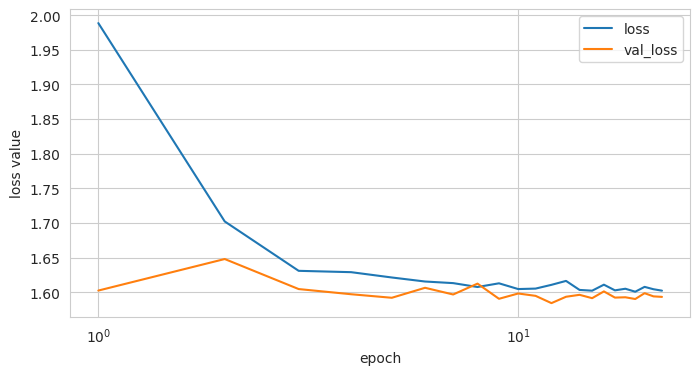

In [32]:
plt.figure(figsize=(8,4),dpi=100)
plt.semilogx(epoch, loss, linewidth=1.5, label='loss')
plt.semilogx(epoch, val_loss, linewidth=1.5, label='val_loss')

plt.xlabel('epoch',fontsize=10)
plt.ylabel('loss value',fontsize=10)
plt.legend(loc=1,fontsize=10);

In [ ]:
# instantiate image data generator

data_gen = image.ImageDataGenerator(
    # preprocessing function for all images
    preprocessing_function=preprocess_input
)

In [ ]:
image_folder = "./cancer/all_cancer_images/"
img_ids = transformed_df["img_id"].values
image_paths = transformed_df["image_path"].values

In [ ]:
images = []
y=[]
for img_id, image_path, class_ in zip(img_ids, image_paths, CLASSES):
    full_image_path = (image_path)

    img = image.load_img(full_image_path, target_size=(500, 500))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    y.append(class_)
    images.append(img)

X = np.concatenate(images)
y_=np.array(y)
print("Shape of x:", X.shape)

In [ ]:
y=to_categorical(y_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [ ]:
train_data_gen = data_gen.flow(X_train, y_train, batch_size=32, subset='training')

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

In [ ]:
np.unique(y_train)

In [ ]:
np.unique(y_test)


In [ ]:
train_data_gen = data_gen.flow(X_train, y_train, batch_size=32, subset='training')
test_data_gen = data_gen.flow(X_test, y_test, batch_size=32, subset='validation')

In [ ]:
test_data_gen = data_gen.flow(X_test, y_test, batch_size=32, subset='validation')

In [ ]:
# define base model
BASE_MODEL = MobileNetV2(
    weights='imagenet', 
    alpha=1.0,          # controls number of overall weights
    include_top=False,  # removal of final dense layers
    pooling='avg',      # average pooling to last convolutional layer's ouput
    input_shape=(224,224,3) # ignored if input tensor is provided
)

In [ ]:
# freeze base model
BASE_MODEL.trainable = False